This is a project to use unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that was used was provided by Udacity's partners at Bertelsmann Arvato Analytics.

I took the data and project description from Udacity's data science nanodegree.

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from collections import OrderedDict

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Merging data in one df

In [196]:
#data was splitted in 4 csv files
df_azdias = {}
for i in range(1,5):
    df_azdias[i] = pd.read_csv("./data/AZDIAS_Subset_{}.csv".format(i), delimiter=",", low_memory=False)
    print(len(df_azdias[i]))
df = pd.concat([d for k,d in df_azdias.items()], ignore_index=True)
#the feature summary file.
feat_info = pd.read_csv("./data/AZDIAS_Feature_Summary.csv", delimiter=";")

222805
222805
222805
222806


In [197]:
df_azdias = df

In [198]:
df_azdias.head()

,Unnamed: 0,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,0,-1,2,1,2.0,3,4,3,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-1,1,2,5.0,1,5,2,5,4,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,2,-1,3,2,3.0,1,4,1,2,3,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,3,2,4,2,2.0,4,2,5,2,1,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,4,-1,3,1,5.0,4,3,4,1,3,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [199]:
df_azdias = df_azdias.drop('Unnamed: 0',axis=1)

In [200]:
df_azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [201]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
...,...,...,...,...
80,PLZ8_HHZ,macrocell_plz8,ordinal,[-1]
81,PLZ8_GBZ,macrocell_plz8,ordinal,[-1]
82,ARBEIT,community,ordinal,"[-1,9]"
83,ORTSGR_KLS9,community,ordinal,"[-1,0]"


## Cleaning the data

### Replacing missing values.

We should replace missing values. The missing data encodings described in feat_info.

First, let's extract it as some iterable

In [202]:
import json
missing_codes  = [row["missing_or_unknown"] for _, row in feat_info.iterrows()]
missing_codes = [missing.replace('XX', '"XX"') for missing in missing_codes]
missing_codes = [missing.replace('X', '"X"') if ',X' in missing else missing for missing in missing_codes]
missing_codes = [json.loads(missing) for missing in missing_codes]
print(missing_codes)

[[-1, 0], [-1, 0, 9], [-1, 0], [0], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [0], [], [], [-1, 0], [0], [0], [0], [0], [0], [0], [-1, 0], [-1, 0], [0], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1, 9], [-1], [-1], [-1, 0], [-1], [-1, 9], [0], [], [], [-1, 0], [-1], [-1, 0], [-1, 0], [0], [], [-1, 0], [], [0], [-1], [-1], [-1, 'X'], ['XX'], [-1, 'XX'], [-1], [-1], [-1], [-1], [-1, 0], [-1, 0], [-1], [-1], [-1], [], [-1, 0], [], [], [-1, 0], [], [-1], [-1], [-1], [-1], [-1, 0], [-1], [-1], [-1, 9], [-1, 0], [-1, 9]]


Replacing missing data codes with NaN

In [203]:
len(missing_codes)

85

In [204]:
df_azdias[df_azdias.columns[0]].replace([], np.NaN, inplace=True)

In [205]:
for i,mis in enumerate(missing_codes):
    df_azdias[df_azdias.columns[i]].replace(mis, np.NaN, inplace=True)

#### Assess Missing Data in Each Row

Now all missing data is represented by NaN. Let's look at missing data by column

In [206]:
azdias_nan = df_azdias.isnull().sum()

azdias_nan[azdias_nan > 0]

AGER_TYP                685843
ALTERSKATEGORIE_GROB      2881
CJT_GESAMTTYP             4854
GEBURTSJAHR             392318
GFK_URLAUBERTYP           4854
                         ...  
PLZ8_HHZ                116515
PLZ8_GBZ                116515
ARBEIT                   97375
ORTSGR_KLS9              97274
RELAT_AB                 97375
Length: 61, dtype: int64

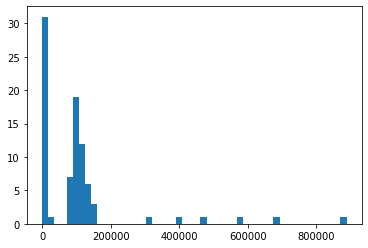

In [207]:
column_names = df_azdias.columns
column_isnull = df_azdias.isnull().sum().tolist()

plt.hist(column_isnull, bins=50);

/home/k/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


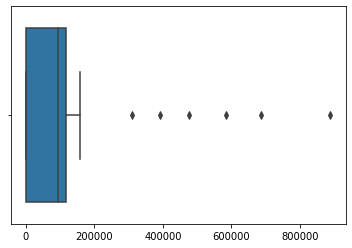

In [208]:
sns.boxplot(column_isnull);

The columns that contain too much missing data is not of much use

In [209]:
cols_to_drop = df_azdias.columns[df_azdias.isnull().sum() > 200000].tolist()

In [210]:
cols_to_drop

['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX']

In [211]:
df_azdias[cols_to_drop]

,AGER_TYP,GEBURTSJAHR,TITEL_KZ,ALTER_HH,KK_KUNDENTYP,KBA05_BAUMAX
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1996.0,NaN,NaN,NaN,5.0
2,NaN,1979.0,NaN,17.0,NaN,NaN
3,2.0,1957.0,NaN,13.0,NaN,1.0
4,NaN,1963.0,NaN,20.0,1.0,NaN
...,...,...,...,...,...,...
891216,NaN,1976.0,NaN,17.0,3.0,NaN
891217,NaN,1970.0,NaN,16.0,NaN,5.0
891218,NaN,1976.0,NaN,17.0,NaN,NaN
891219,NaN,1994.0,NaN,NaN,NaN,NaN


In [212]:
df_azdias.drop(cols_to_drop, axis=1, inplace=True)

In [213]:
df_null_search = pd.DataFrame({"cols": df_azdias.columns.tolist(),
                               "null_values": df_azdias.isnull().sum().tolist()})

Now let's look at the remaining columns. Some of them have the same amount of missing data.

In [214]:
df_null_search.sort_values(by="null_values", ascending=False)

,cols,null_values
64,KKK,158064
67,REGIOTYP,158064
43,W_KEIT_KIND_HH,147988
58,KBA05_ANTG4,133324
55,KBA05_ANTG1,133324
...,...,...
31,SEMIO_KRIT,0
32,SEMIO_DOM,0
33,SEMIO_KAEM,0
34,SEMIO_PFLICHT,0


In [215]:
df_null_search.groupby("null_values")["cols"].nunique()

null_values
0         24
2881       1
4854       6
18348      1
73499      4
73969      1
77792      2
93148      4
93155      1
93740      3
94572      1
97008      1
97274      1
97375      2
97632      1
99352      3
99611      1
105800     1
108164     1
108315     1
111196     3
116515     7
133324     6
147988     1
158064     2
Name: cols, dtype: int64

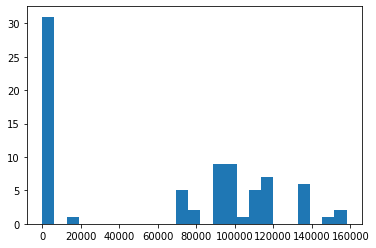

In [216]:
column_names = df_azdias.columns
column_isnull = df_azdias.isnull().sum().tolist()

plt.hist(column_isnull, bins=25);

We can see that the majority of colums have very low NaN values, we can go ahead and ignore them.

There are a couple more columns that have NaNs at the level between 50,000 and 160,000. 

#### Assess Missing Data in Each Row

In [217]:
# How much data is missing in each row of the dataset?
nan_rows = df_azdias.isnull().sum(axis=1).tolist()

df_azdias.isnull().sum(axis=1)

0         43
1          0
2          0
3          7
4          0
          ..
891216     3
891217     4
891218     5
891219     0
891220     0
Length: 891221, dtype: int64

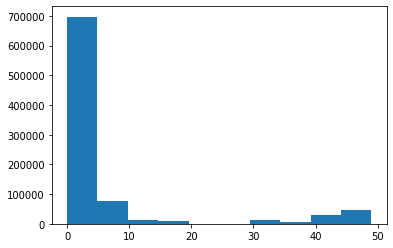

In [218]:
plt.hist(nan_rows);

Let's divide the data into two subsets based on the number of missing

In [219]:

df_azdias_p1 = df_azdias[df_azdias.isnull().sum(axis=1) < 20]

df_azdias_p1.shape

(797077, 79)

In [220]:
df_azdias_p2 = df_azdias[df_azdias.isnull().sum(axis=1) >= 20]

df_azdias_p2.shape

(94144, 79)

In [221]:
assert df_azdias.shape[0] == df_azdias_p1.shape[0] + df_azdias_p2.shape[0]

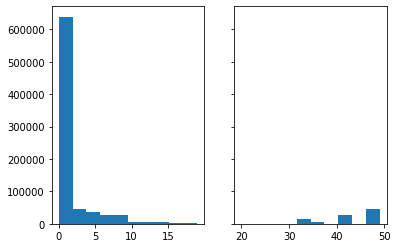

In [222]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(df_azdias_p1.isnull().sum(axis=1).tolist())
ax2.hist(df_azdias_p2.isnull().sum(axis=1).tolist());

For first 4 columns let's plot histograms with kdes of rows with count of NaNs above 20 and below

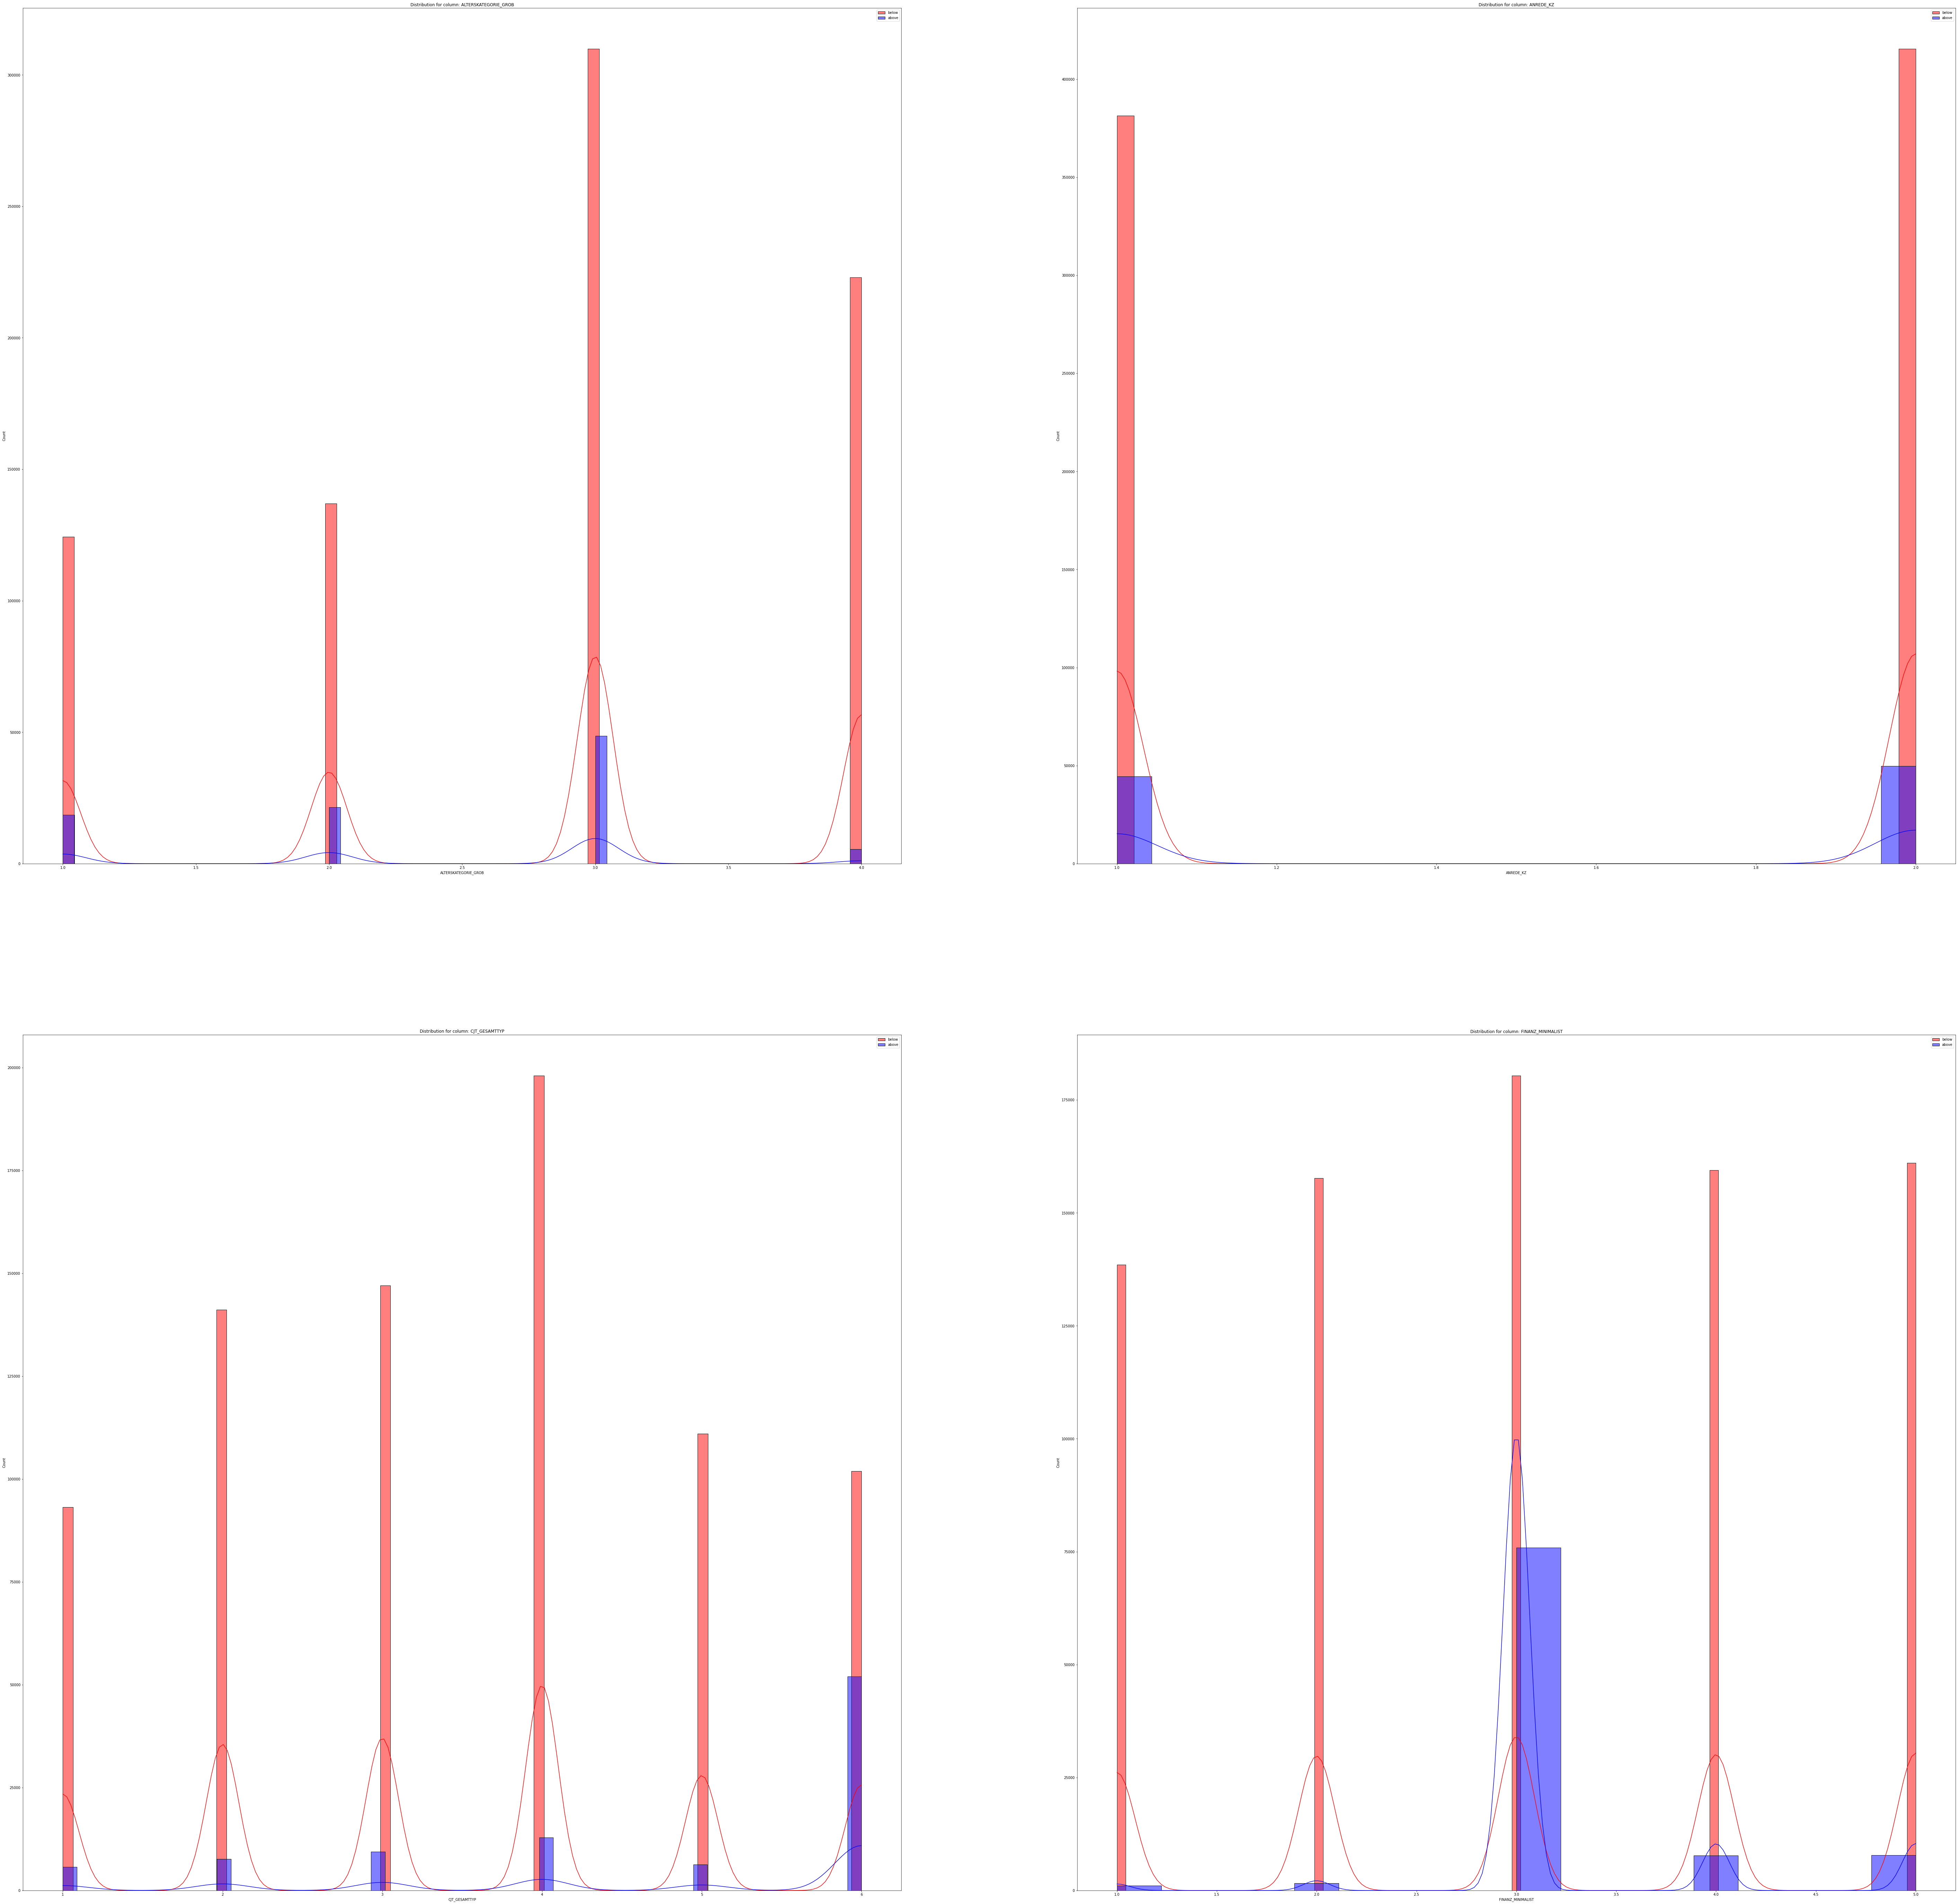

In [223]:
plt.figure(figsize=(100,100))
for i, col in enumerate(df_azdias.columns[:4]):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_azdias_p1[col][df_azdias_p1[col].notnull()], label='below', kde=True, color='red')
    sns.histplot(df_azdias_p2[col][df_azdias_p2[col].notnull()], label='above', kde=True, color='blue')
    plt.title('Distribution for column: {}'.format(col))
    plt.legend();

Now let's compare columns distributions for two datasets (rows with <20 NAs and >20 NAs). If we see that these distributions are very different (low p-values as a result of our KS-Test), then we have statistical evidence that we can use to evaluate whether we should drop the >20 NA values-per row subset.

In [224]:
from scipy import stats

In [225]:
ks_by_column = {}
for col in df_azdias.columns:
    try:
        st, p_value = stats.ks_2samp(df_azdias_p1[col], df_azdias_p2[col], alternative='two-sided')
        ks_by_column[col] = (st, p_value)
    except:
        ks_by_column[col] = (None, None)



In [226]:
sum([v[1] < 0.05 for k,v in ks_by_column.items() if v[1] is not None])

75

We can see that for all numerical columns (for which it was possible to hold KS-test) p-value is very low, meaning, that for each column we reject hypothesis of equal distributions.
We could suggest that there is some bias introduced in the way the data was collected or entered for rows with many NAs values.

In [227]:
len(df_azdias_p1)/len(df_azdias_p2)

8.466572484704283

In [228]:
df_azdias1_cols = df_azdias_p1.columns.tolist()
feat_info = feat_info[feat_info['attribute'].isin(df_azdias1_cols)]

# Selecting and Re-Encode Features

First, let's look at data types among features

In [229]:
feat_info['type'].nunique()

4

In [230]:
feat_info[feat_info['type'] == 'interval']

,attribute,information_level,type,missing_or_unknown


In [231]:
feat_info.groupby("type").count()

,attribute,information_level,missing_or_unknown
type,,,
categorical,18,18,18
mixed,6,6,6
numeric,6,6,6
ordinal,49,49,49


#### Re-Encode Categorical Features

In [232]:
df_dtype = {}
dtypes = feat_info.groupby("type").groups.keys()
for d in dtypes:
    df_dtype[d]=feat_info[feat_info['type']==d]['attribute']

In [233]:
def check_unique_vals(df):
    for col in df.columns:
        values = list(df[col].unique())
        print(f'{col}: {values}')

In [234]:
df_dtype

{'categorical': 2            ANREDE_KZ
 3        CJT_GESAMTTYP
 10           FINANZTYP
 12     GFK_URLAUBERTYP
 13    GREEN_AVANTGARDE
 17     LP_FAMILIE_FEIN
 18     LP_FAMILIE_GROB
 19      LP_STATUS_FEIN
 20      LP_STATUS_GROB
 21    NATIONALITAET_KZ
 38         SHOPPER_TYP
 39             SOHO_KZ
 41            VERS_TYP
 42            ZABEOTYP
 52         GEBAEUDETYP
 55         OST_WEST_KZ
 57     CAMEO_DEUG_2015
 58      CAMEO_DEU_2015
 Name: attribute, dtype: object,
 'mixed': 15      LP_LEBENSPHASE_FEIN
 16      LP_LEBENSPHASE_GROB
 22    PRAEGENDE_JUGENDJAHRE
 56                 WOHNLAGE
 59          CAMEO_INTL_2015
 79              PLZ8_BAUMAX
 Name: attribute, dtype: object,
 'numeric': 44           ANZ_PERSONEN
 45              ANZ_TITEL
 50    ANZ_HAUSHALTE_AKTIV
 51           ANZ_HH_TITEL
 54       MIN_GEBAEUDEJAHR
 74       KBA13_ANZAHL_PKW
 Name: attribute, dtype: object,
 'ordinal': 1      ALTERSKATEGORIE_GROB
 4         FINANZ_MINIMALIST
 5             FINANZ_SPARER




Our approach will be the following...

    Categorical...
        Ordinal Categoricals: Convert to numeric ordinals if necessary and keep the same for simplicity
        Multi-Level Categoricals: One-Hot encode these values
        Binary Categoricals: Convert to numeric binaries ([0,1])
    Numeric: Keep the same
    Mixed: Investigate first, then decide on an approach



ordinals

In [235]:
check_unique_vals(df_azdias_p1[df_dtype['categorical']])

ANREDE_KZ: [2, 1]
CJT_GESAMTTYP: [5.0, 3.0, 2.0, 4.0, 1.0, 6.0, nan]
FINANZTYP: [1, 6, 5, 2, 4, 3]
GFK_URLAUBERTYP: [10.0, 1.0, 5.0, 12.0, 9.0, 3.0, 8.0, 11.0, 4.0, 2.0, 7.0, 6.0, nan]
GREEN_AVANTGARDE: [0, 1]
LP_FAMILIE_FEIN: [5.0, 1.0, nan, 10.0, 2.0, 7.0, 11.0, 8.0, 4.0, 6.0, 9.0, 3.0]
LP_FAMILIE_GROB: [3.0, 1.0, nan, 5.0, 2.0, 4.0]
LP_STATUS_FEIN: [2.0, 3.0, 9.0, 4.0, 1.0, 10.0, 5.0, 8.0, 6.0, 7.0, nan]
LP_STATUS_GROB: [1.0, 2.0, 4.0, 5.0, 3.0, nan]
NATIONALITAET_KZ: [1.0, 3.0, 2.0, nan]
SHOPPER_TYP: [3.0, 2.0, 1.0, 0.0, nan]
SOHO_KZ: [1.0, 0.0]
VERS_TYP: [2.0, 1.0, nan]
ZABEOTYP: [5, 3, 4, 1, 6, 2]
GEBAEUDETYP: [8.0, 1.0, 3.0, 2.0, 6.0, 4.0, 5.0]
OST_WEST_KZ: ['W', 'O']
CAMEO_DEUG_2015: ['8', '4', '2', '6', '1', '9', '5', '7', nan, '3', '4.0', '7.0', '8.0', '6.0', '3.0', '5.0', '9.0', '2.0', '1.0']
CAMEO_DEU_2015: ['8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C', '8B', '7A', '5D', '9E', nan, '9B', '1B', '3D', '4E', '4B', '3C', '5A', '7B', '9A', '6D', '6E', '2C', '

In [236]:
df_azdias_p1[df_dtype['ordinal']].head()

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,REGIOTYP,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,1,5,2,5,4,5,3.0,1.0,5,...,3.0,2.0,3.0,2.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,1,4,1,2,3,5,3.0,3.0,4,...,2.0,3.0,3.0,1.0,0.0,4.0,4.0,3.0,5.0,2.0
3,4.0,4,2,5,2,1,2,2.0,2.0,5,...,NaN,2.0,2.0,2.0,0.0,3.0,4.0,2.0,3.0,3.0
4,3.0,4,3,4,1,3,2,3.0,5.0,6,...,5.0,2.0,4.0,2.0,1.0,3.0,3.0,4.0,6.0,5.0
5,1.0,3,1,5,2,2,5,3.0,3.0,2,...,5.0,2.0,3.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


categorical

In [237]:
binary = []
multi = []
for col in df_azdias_p1[df_dtype['categorical']]:
    values = df_azdias_p1[df_dtype['categorical']][col].nunique()
    if values == 2:
        binary.append(col)
    else:
        multi.append(col)
    print('col:{}, vals: {}'.format(col, values))

col:ANREDE_KZ, vals: 2
col:CJT_GESAMTTYP, vals: 6
col:FINANZTYP, vals: 6
col:GFK_URLAUBERTYP, vals: 12
col:GREEN_AVANTGARDE, vals: 2
col:LP_FAMILIE_FEIN, vals: 11
col:LP_FAMILIE_GROB, vals: 5
col:LP_STATUS_FEIN, vals: 10
col:LP_STATUS_GROB, vals: 5
col:NATIONALITAET_KZ, vals: 3
col:SHOPPER_TYP, vals: 4
col:SOHO_KZ, vals: 2
col:VERS_TYP, vals: 2
col:ZABEOTYP, vals: 6
col:GEBAEUDETYP, vals: 7
col:OST_WEST_KZ, vals: 2
col:CAMEO_DEUG_2015, vals: 18
col:CAMEO_DEU_2015, vals: 44


In [238]:
df_azdias_p1

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,3.0,2,5.0,1,4,2,5,4,4,1,...,3.0,2.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
891217,2.0,1,4.0,3,3,3,2,2,3,6,...,1.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,6.0,5.0
891218,2.0,2,4.0,2,4,2,5,4,3,1,...,4.0,2.0,0.0,0.0,1.0,3.0,4.0,2.0,2.0,3.0
891219,1.0,1,3.0,1,5,3,5,5,5,1,...,1.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,7.0,5.0


In [239]:
df_azdias_p1['CAMEO_DEUG_2015'] = df_azdias_p1['CAMEO_DEUG_2015'].astype('float')

/tmp/ipykernel_495516/4210159516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_azdias_p1['CAMEO_DEUG_2015'] = df_azdias_p1['CAMEO_DEUG_2015'].astype('float')


In [240]:
df_azdias_p1['CAMEO_DEUG_2015'].nunique()

9

In [241]:
df_azdias_p1[binary].head()

,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,VERS_TYP,OST_WEST_KZ
1,2,0,1.0,2.0,W
2,2,1,0.0,1.0,W
3,2,0,0.0,1.0,W
4,1,0,0.0,2.0,W
5,2,0,0.0,2.0,W


Only "OST_WEST_KZ" needs to be encoded to numerical.

In [242]:
df_azdias_p1['OST_WEST_KZ'].value_counts()

W    628695
O    168382
Name: OST_WEST_KZ, dtype: int64

We'll do one-hot encoding with other multicategorial columns

In [243]:
multi.append('OST_WEST_KZ')

In [244]:
df_azdias_p1[multi].head()

,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP,ZABEOTYP,GEBAEUDETYP,CAMEO_DEUG_2015,CAMEO_DEU_2015,OST_WEST_KZ
1,5.0,1,10.0,5.0,3.0,2.0,1.0,1.0,3.0,5,8.0,8.0,8A,W
2,3.0,1,10.0,1.0,1.0,3.0,2.0,1.0,2.0,5,1.0,4.0,4C,W
3,2.0,6,1.0,NaN,NaN,9.0,4.0,1.0,1.0,3,1.0,2.0,2A,W
4,5.0,5,5.0,10.0,5.0,3.0,2.0,1.0,2.0,4,1.0,6.0,6B,W
5,2.0,2,1.0,1.0,1.0,4.0,2.0,1.0,0.0,4,1.0,8.0,8C,W


Numeric

In [245]:
df_azdias_p1[df_dtype['numeric']].describe()

,ANZ_PERSONEN,ANZ_TITEL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,MIN_GEBAEUDEJAHR,KBA13_ANZAHL_PKW
count,797077.000000,797077.000000,790791.000000,793391.000000,797077.000000,785011.000000
mean,1.729775,0.004151,8.358912,0.040663,1993.257848,619.657750
std,1.156330,0.068529,15.680169,0.324150,3.282927,340.024479
min,0.000000,0.000000,1.000000,0.000000,1985.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,1992.000000,384.000000
50%,1.000000,0.000000,4.000000,0.000000,1992.000000,549.000000
75%,2.000000,0.000000,10.000000,0.000000,1993.000000,778.000000
max,45.000000,4.000000,595.000000,23.000000,2016.000000,2300.000000


Mixed

In [246]:
df_azdias_p1[df_dtype['mixed']].head()

,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,WOHNLAGE,CAMEO_INTL_2015,PLZ8_BAUMAX
1,21.0,6.0,14.0,4.0,51,1.0
2,3.0,1.0,15.0,2.0,24,1.0
3,NaN,NaN,8.0,7.0,12,1.0
4,32.0,10.0,8.0,3.0,43,2.0
5,8.0,2.0,3.0,7.0,54,1.0


In [247]:
for column in df_azdias_p1[df_dtype['mixed']].columns:
    print(column, df_azdias_p1[df_dtype['mixed']][column].nunique())


LP_LEBENSPHASE_FEIN 40
LP_LEBENSPHASE_GROB 12
PRAEGENDE_JUGENDJAHRE 15
WOHNLAGE 8
CAMEO_INTL_2015 42
PLZ8_BAUMAX 5


Looking at the Data_Dictionary.md description of columns we can see that actually all these columns except for 'CAMEO_INTL_2015' and 'PRAEGENDE_JUGENDJAHRE' are categorical

In [248]:
for col in df_dtype['mixed']:
    if col not in ['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE']:
        multi.append(col)

so, let's get one-hot encoding for categorical

In [249]:
len(multi)

18

In [250]:
df_azdias_p1 = pd.get_dummies(df_azdias_p1, columns = multi)

In [251]:
multi

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'OST_WEST_KZ',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'WOHNLAGE',
 'PLZ8_BAUMAX']

In [252]:
df_azdias_p1.shape

(797077, 256)

In [253]:
multi

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'OST_WEST_KZ',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'WOHNLAGE',
 'PLZ8_BAUMAX']

the last columns to deal with are "PRAEGENDE_JUGENDJAHRE" (combines information on three dimensions: generation by decade, movement, and nation) and "CAMEO_INTL_2015" (combines information on two axes: wealth and life stage)

Below is the mapping for "PRAEGENDE_JUGENDJAHRE" from the Data_Dictionary.md

    1: 40s - war years (Mainstream, E+W)
    2: 40s - reconstruction years (Avantgarde, E+W)
    3: 50s - economic miracle (Mainstream, E+W)
    4: 50s - milk bar / Individualisation (Avantgarde, E+W)
    5: 60s - economic miracle (Mainstream, E+W)
    6: 60s - generation 68 / student protestors (Avantgarde, W)
    7: 60s - opponents to the building of the Wall (Avantgarde, E)
    8: 70s - family orientation (Mainstream, E+W)
    9: 70s - peace movement (Avantgarde, E+W)
    10: 80s - Generation Golf (Mainstream, W)
    11: 80s - ecological awareness (Avantgarde, W)
    12: 80s - FDJ / communist party youth organisation (Mainstream, E)
    13: 80s - Swords into ploughshares (Avantgarde, E)
    14: 90s - digital media kids (Mainstream, E+W)
    15: 90s - ecological awareness (Avantgarde, E+W)



In [254]:
movement = []
decade = []
for val in df_azdias_p1['PRAEGENDE_JUGENDJAHRE']:
    # Mapping for movement
    if val in [1,3,5,8,10,12,14]:
        movement.append(0) 
    elif val in [2,4,6,7,9,11,13,15]:
        movement.append(1)
    else:
        movement.append(np.NaN)
    # Mapping for decade  
    if val in [1,2]:
        decade.append(40)
    elif val in [3,4]:
        decade.append(50)
    elif val in [5,6,7]:
        decade.append(60)
    elif val in [8,9]:
        decade.append(70)
    elif val in [10,11,12]:
        decade.append(80)
    elif val in [13,14,15]:
        decade.append(90)
    else:
        decade.append(np.NaN)



movement = pd.Series(movement)
decade = pd.Series(decade)



In [255]:
df_azdias_p1['movement']=movement
df_azdias_p1['decade']=decade

Below is a mapping for "CAMEO_INTL_2015" from the Data_Dictionary.md

    11: Wealthy Households - Pre-Family Couples & Singles
    12: Wealthy Households - Young Couples With Children
    13: Wealthy Households - Families With School Age Children
    14: Wealthy Households - Older Families & Mature Couples
    15: Wealthy Households - Elders In Retirement
    21: Prosperous Households - Pre-Family Couples & Singles
    22: Prosperous Households - Young Couples With Children
    23: Prosperous Households - Families With School Age Children
    24: Prosperous Households - Older Families & Mature Couples
    25: Prosperous Households - Elders In Retirement
    31: Comfortable Households - Pre-Family Couples & Singles
    32: Comfortable Households - Young Couples With Children
    33: Comfortable Households - Families With School Age Children
    34: Comfortable Households - Older Families & Mature Couples
    35: Comfortable Households - Elders In Retirement
    41: Less Affluent Households - Pre-Family Couples & Singles
    42: Less Affluent Households - Young Couples With Children
    43: Less Affluent Households - Families With School Age Children
    44: Less Affluent Households - Older Families & Mature Couples
    45: Less Affluent Households - Elders In Retirement
    51: Poorer Households - Pre-Family Couples & Singles
    52: Poorer Households - Young Couples With Children
    53: Poorer Households - Families With School Age Children
    54: Poorer Households - Older Families & Mature Couples
    55: Poorer Households - Elders In Retirement


In [256]:
cameo_intl = []
for val in df_azdias_p1['CAMEO_INTL_2015']:
    try:
        val = int(val)
        if 10 < val < 19:
            cameo_intl.append(5)
        elif 20 < val < 29:
            cameo_intl.append(4)
        elif 30 < val < 39:
            cameo_intl.append(3)
        elif 40 < val < 49:
            cameo_intl.append(2)
        elif 50 < val < 59:
            cameo_intl.append(1)
        else:
            cameo_intl.append(np.nan)
    except:
        cameo_intl.append(np.nan)

In [257]:
cameo_intl = pd.Series(cameo_intl)
df_azdias_p1['cameo_intl'] = cameo_intl
df_azdias_p1.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,WOHNLAGE_7.0,WOHNLAGE_8.0,PLZ8_BAUMAX_1.0,PLZ8_BAUMAX_2.0,PLZ8_BAUMAX_3.0,PLZ8_BAUMAX_4.0,PLZ8_BAUMAX_5.0,movement,decade,cameo_intl
1,1.0,2,1,5,2,5,4,5,0,3.0,...,0,0,1,0,0,0,0,1.0,90.0,4.0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,0,0,1,0,0,0,0,0.0,70.0,5.0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,1,0,1,0,0,0,0,0.0,70.0,2.0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,0,0,0,1,0,0,0,0.0,50.0,1.0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,1,0,1,0,0,0,0,0.0,80.0,4.0


In [258]:


df_azdias_p1.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1,inplace=True)



We replaced "PRAEGENDE_JUGENDJAHRE" with two new columns: movement and decade, "CAMEO_INTL_2015" with a column called cameo_intl according to the mapping from the Data_Dictionary.md.

We can summarize all these steps as a function for cleaning any given DF with the same structure as our demographics data.

In [314]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',';')
    missing_codes  = [row["missing_or_unknown"] for _, row in feat_info.iterrows()]
    missing_codes = [missing.replace('XX', '"XX"') for missing in missing_codes]
    missing_codes = [missing.replace('X', '"X"') if ',X' in missing else missing for missing in missing_codes]
    missing_codes = [json.loads(missing) for missing in missing_codes]
    for i,mis in enumerate(missing_codes):
        df[df.columns[i]].replace(mis, np.NaN, inplace=True)
    
    # remove outlier columns
    outlier_columns = ['AGER_TYP',
                    'GEBURTSJAHR',
                    'TITEL_KZ',
                    'ALTER_HH',
                    'KK_KUNDENTYP',
                    'KBA05_BAUMAX']
    df.drop(labels=outlier_columns,axis=1,inplace=True)
    df['no_na_row'] = df.isna().sum(axis=1)
    df = df[df['no_na_row']<20]
    df.drop('no_na_row',inplace=True,axis=1)
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].astype('float')
    # select, re-encode, and engineer column values.
    feat_info = feat_info.set_index('attribute').drop(outlier_columns).reset_index()
    df_dtype = {}
    dtypes = ['ordinal','categorical','numeric','mixed']
    for d in dtypes:
        df_dtype[d]=feat_info[feat_info['type']==d]['attribute']    
    
    # Separating binary from multi-level categorical columns
    binary_cats = []
    multi_level_cats = []
    for col in df[df_dtype['categorical']]:
        values = df[df_dtype['categorical']][col].nunique()
        if col in ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP']:
            binary_cats.append(col)
        else:
            multi_level_cats.append(col)
    # Including OST_WEST_KZ in the list to be one-hot encoded
    for col in df_dtype['mixed']:
        if col not in ['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE']:
            multi_level_cats.append(col)
    # One-hot encoding
    df = pd.get_dummies(df,columns=multi_level_cats)
    
    # Dealing with the 2 particular mixed vars...
    movement = []
    decade = []
    for val in df['PRAEGENDE_JUGENDJAHRE']:
        # Mapping for movement
        if val in [1,3,5,8,10,12,14]:
            movement.append(0) 
        elif val in [2,4,6,7,9,11,13,15]:
            movement.append(1)
        else:
            movement.append(np.NaN)
        # Mapping for decade  
        if val in [1,2]:
            decade.append(40)
        elif val in [3,4]:
            decade.append(50)
        elif val in [5,6,7]:
            decade.append(60)
        elif val in [8,9]:
            decade.append(70)
        elif val in [10,11,12]:
            decade.append(80)
        elif val in [13,14,15]:
            decade.append(90)
        else:
            decade.append(np.NaN)
    movement = pd.Series(movement)
    decade = pd.Series(decade)
    df['movement']=movement
    df['decade']=decade
            
    cameo_intl = []
    for val in df['CAMEO_INTL_2015']:
        try:
            val = int(val)
            if 10 < val < 19:
                cameo_intl.append(5)
            elif 20 < val < 29:
                cameo_intl.append(4)
            elif 30 < val < 39:
                cameo_intl.append(3)
            elif 40 < val < 49:
                cameo_intl.append(2)
            elif 50 < val < 59:
                cameo_intl.append(1)
            else:
                cameo_intl.append(np.nan)
        except:
            cameo_intl.append(np.nan)
    cameo_intl = pd.Series(cameo_intl)
    df['cameo_intl'] = cameo_intl
    df.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1,inplace=True)            
            
    return df

In [260]:
test_func_az = df.copy()
test_df = clean_data(test_func_az.drop('Unnamed: 0',axis=1))


df_azdias_p1.shape == test_df.shape




/tmp/ipykernel_495516/1499842165.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  test_df = clean_data(test_func_az.drop('Unnamed: 0',axis=1))
/tmp/ipykernel_495516/315508250.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('no_na_row',inplace=True,axis=1)
/tmp/ipykernel_495516/315508250.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].astype('float')


['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX']
Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP',
       ...
       'WOHNLAGE_3.0', 'WOHNLAGE_4.0', 'WOHNLAGE_5.0', 'WOHNLAGE_7.0',
       'WOHNLAGE_8.0', 'PLZ8_BAUMAX_1.0', 'PLZ8_BAUMAX_2.0', 'PLZ8_BAUMAX_3.0',
       'PLZ8_BAUMAX_4.0', 'PLZ8_BAUMAX_5.0'],
      dtype='object', length=256)


True

checking that cleaning works correctly

In [261]:
df_azdias_p1.shape

(797077, 257)

In [262]:
test_df.shape

(797077, 257)


# Feature Transformation
### Feature Scaling

So we're going to use principal component analysis (PCA) to reduce the number of dimensions (features) of our data. However, in order to do so, our data needs to be standardized (mean=0 and bonus if std dev = 0). We also need to take care of all the NA values that we kept.

We will impute NA values using each column's median and use the StandardScaler to standardize our data.



In [263]:
from sklearn.impute import SimpleImputer

In [264]:
# Imputing missing values with the median
med_imp = SimpleImputer(strategy='median')
df_imp = med_imp.fit_transform(df_azdias_p1)



In [265]:
# Standardizing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imp)

In [266]:
df_scaled.shape

(797077, 257)

### PCA

In [267]:
pca = PCA(40)
X_pca = pca.fit_transform(df_scaled)

In [268]:
pca.explained_variance_ratio_.sum()


0.4945402435448781

about 47% of variance explained with 40 components. Let's try more components

In [269]:
n_components = [80,110,150,180,210]
for n in n_components:
    pca = PCA(n)
    X_pca = pca.fit_transform(df_scaled)
    if pca.explained_variance_ratio_.sum() >= .9:
        break

In [270]:
print(pca.explained_variance_ratio_.sum())
print(pca.n_components)

0.9307416583620266
150


Explained variance plot for principal components

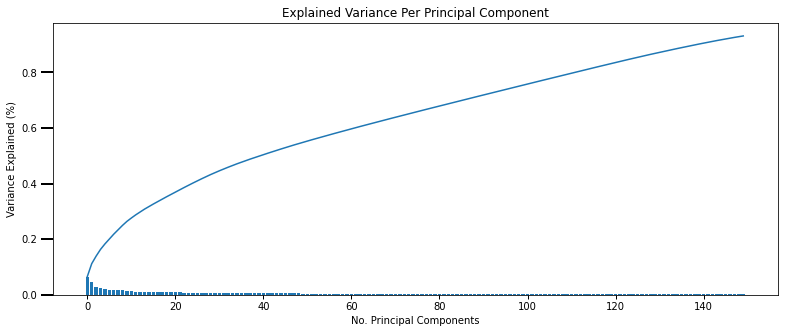

In [275]:
ticks = np.arange(pca.n_components)
values = pca.explained_variance_ratio_

plt.figure(figsize = (13,5))
ax = plt.subplot(111)
cumvals = np.cumsum(values)
ax.bar(ticks,values)
ax.plot(ticks,cumvals)

ax.xaxis.set_tick_params(width=1)
ax.yaxis.set_tick_params(width=2,length=12)

ax.set_xlabel("No. Principal Components")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')
plt.show()

After performing PCA we reduced number of features from 266 to 150

Next, let's look at first three components and try to comprehense what they represent

In [276]:
feat_names = df_azdias_p1.columns.values

In [277]:
import plotly_express as px
def plot_pca_dim(pca,feat_names,dim,features):
    '''
    For a given fitted PCA object, the given component, and a given number of features, this plots
    the variance that the particular component captures.
    '''

    names_to_wts = sorted(zip(pca.components_[dim],feat_names),key=lambda x: abs(x[0]),reverse=True)
    names_to_wts = np.array(names_to_wts)
    print(feat_info[feat_info['attribute'].isin([wts[1] for wts in names_to_wts[:10]])])
    nm_to_wt_df = pd.DataFrame(names_to_wts,columns=['var','feature'])
    nm_to_wt_df['var'] = nm_to_wt_df['var'].astype(float)
    return px.bar(nm_to_wt_df[:features],x='feature',y='var',
           color='var',color_continuous_scale=px.colors.sequential.Sunsetdark,
           labels = {'var': 'Variance (%)','feature':'Feature Names'},
           height=400,width=600)

In [286]:
plot_pca_dim(pca,feat_names,0,10)

             attribute information_level     type missing_or_unknown
4    FINANZ_MINIMALIST            person  ordinal               [-1]
46  HH_EINKOMMEN_SCORE         household  ordinal             [-1,0]
60         KBA05_ANTG1     microcell_rr3  ordinal               [-1]
65           KBA05_GBZ     microcell_rr3  ordinal             [-1,0]
71          MOBI_REGIO        region_rr1  ordinal                 []
75          PLZ8_ANTG1    macrocell_plz8  ordinal               [-1]
77          PLZ8_ANTG3    macrocell_plz8  ordinal               [-1]
78          PLZ8_ANTG4    macrocell_plz8  ordinal               [-1]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Feature Names=%{x}<br>Variance (%)=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([-0.19645266,  0.18905337, -0.18026883,  0.17876117, -0.17842659,
                                         -0.17775581, -0.17427507,  0.17347182,  0.17281442, -0.1680374 ]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['MOBI_REGIO', 'LP_STATUS_GROB_1.0', 'KBA05_ANTG1', 'PLZ8_ANTG3',
                          'PLZ8_ANTG1', 'FINANZ_MINIMALIST', 'KBA05_GBZ', 'HH_EINKOMMEN_SCORE',
                          'PLZ8_ANTG4', 'PLZ8_BAUMAX_1.0'], dtype=object),
              'xaxis': 'x',
              'y': array([-0.19645266,  0.18905337, -0.18026883,  0.17876117, -0.17842659,
                          -0.17775581, -0.17427507,  0.17347182,  0.17281442, -0.1680374 ]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Variance (%)'}},
                             'colorscale': [[0.0, 'rgb(252, 222, 156)'],
                                            [0.16666666666666666, 'rgb(250, 164,
                                            118)'], [0.3333333333333333, 'rgb(240,
                                            116, 110)'], [0.5, 'rgb(227, 79,
                                            111)'], [0.6666666666666666, 'rgb(220,
                                            57, 119)'], [0.8333333333333334,
                                            'rgb(185, 37, 122)'], [1.0, 'rgb(124,
                                            29, 111)']]},
               'height': 400,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Feature Names'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Variance (%)'}}}
})

In [287]:
plot_pca_dim(pca,feat_names,1,10)

                attribute information_level     type missing_or_unknown
1    ALTERSKATEGORIE_GROB            person  ordinal           [-1,0,9]
5           FINANZ_SPARER            person  ordinal               [-1]
6        FINANZ_VORSORGER            person  ordinal               [-1]
7          FINANZ_ANLEGER            person  ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person  ordinal               [-1]
26              SEMIO_REL            person  ordinal             [-1,9]
30              SEMIO_ERL            person  ordinal             [-1,9]
36          SEMIO_PFLICHT            person  ordinal             [-1,9]
37            SEMIO_TRADV            person  ordinal             [-1,9]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Feature Names=%{x}<br>Variance (%)=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([ 0.22934404, -0.22869225,  0.21824718, -0.21276887, -0.20845544,
                                         -0.20402385, -0.20260961, -0.20202761,  0.1934106 ,  0.17176132]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['ALTERSKATEGORIE_GROB', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
                          'FINANZ_UNAUFFAELLIGER', 'SEMIO_REL', 'SEMIO_TRADV', 'SEMIO_PFLICHT',
                          'FINANZ_ANLEGER', 'ZABEOTYP_3', 'SEMIO_ERL'], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.22934404, -0.22869225,  0.21824718, -0.21276887, -0.20845544,
                          -0.20402385, -0.20260961, -0.20202761,  0.1934106 ,  0.17176132]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Variance (%)'}},
                             'colorscale': [[0.0, 'rgb(252, 222, 156)'],
                                            [0.16666666666666666, 'rgb(250, 164,
                                            118)'], [0.3333333333333333, 'rgb(240,
                                            116, 110)'], [0.5, 'rgb(227, 79,
                                            111)'], [0.6666666666666666, 'rgb(220,
                                            57, 119)'], [0.8333333333333334,
                                            'rgb(185, 37, 122)'], [1.0, 'rgb(124,
                                            29, 111)']]},
               'height': 400,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Feature Names'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Variance (%)'}}}
})

In [288]:
plot_pca_dim(pca,feat_names,2,10)

         attribute information_level         type missing_or_unknown
2        ANREDE_KZ            person  categorical             [-1,0]
7   FINANZ_ANLEGER            person      ordinal               [-1]
24       SEMIO_SOZ            person      ordinal             [-1,9]
25       SEMIO_FAM            person      ordinal             [-1,9]
28      SEMIO_VERT            person      ordinal             [-1,9]
30       SEMIO_ERL            person      ordinal             [-1,9]
31      SEMIO_KULT            person      ordinal             [-1,9]
33      SEMIO_KRIT            person      ordinal             [-1,9]
34       SEMIO_DOM            person      ordinal             [-1,9]
35      SEMIO_KAEM            person      ordinal             [-1,9]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Feature Names=%{x}<br>Variance (%)=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([-0.33580428,  0.31005612, -0.30497796, -0.27237102, -0.26005944,
                                          0.25760128,  0.25116244,  0.25100361, -0.20928862, -0.14410751]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['ANREDE_KZ', 'SEMIO_VERT', 'SEMIO_KAEM', 'SEMIO_DOM', 'SEMIO_KRIT',
                          'SEMIO_FAM', 'SEMIO_SOZ', 'SEMIO_KULT', 'SEMIO_ERL', 'FINANZ_ANLEGER'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([-0.33580428,  0.31005612, -0.30497796, -0.27237102, -0.26005944,
                           0.25760128,  0.25116244,  0.25100361, -0.20928862, -0.14410751]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Variance (%)'}},
                             'colorscale': [[0.0, 'rgb(252, 222, 156)'],
                                            [0.16666666666666666, 'rgb(250, 164,
                                            118)'], [0.3333333333333333, 'rgb(240,
                                            116, 110)'], [0.5, 'rgb(227, 79,
                                            111)'], [0.6666666666666666, 'rgb(220,
                                            57, 119)'], [0.8333333333333334,
                                            'rgb(185, 37, 122)'], [1.0, 'rgb(124,
                                            29, 111)']]},
               'height': 400,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Feature Names'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Variance (%)'}}}
})

We can see that second and third components describe personal info and firs describes mixture of region and macrocell

# Clustering

In [289]:
import time
scores = []

In [290]:
clusters = np.arange(3,12)
for i in clusters:
    start= time.time()
    model = KMeans(i)
    model.fit(X_pca)
    # Score is sum of squared distances to a sample's assigned centroid
    scores.append(abs(model.score(X_pca)))
    end = time.time()
    print(f'Running Score for {i} Clusters: {abs(model.score(X_pca)):.3f}')
    print(f'Time taken: {end-start:.2f} seconds.')

Running Score for 3 Clusters: 174961004.609
Time taken: 18.56 seconds.
Running Score for 4 Clusters: 171365907.125
Time taken: 18.99 seconds.
Running Score for 5 Clusters: 168725884.259
Time taken: 21.95 seconds.
Running Score for 6 Clusters: 165897256.530
Time taken: 32.12 seconds.
Running Score for 7 Clusters: 163749286.159
Time taken: 32.26 seconds.
Running Score for 8 Clusters: 161364207.184
Time taken: 31.93 seconds.
Running Score for 9 Clusters: 159339474.730
Time taken: 35.63 seconds.
Running Score for 10 Clusters: 156472940.978
Time taken: 37.55 seconds.
Running Score for 11 Clusters: 155275866.349
Time taken: 36.47 seconds.


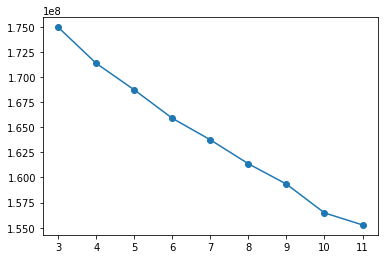

In [291]:
plt.plot(clusters,scores,marker="o")
plt.show()

Seems linear. Maybe try for some more clusters

In [292]:
clusters = np.arange(12,16)
for i in clusters:
    start=time.time()
    model = KMeans(i)
    model.fit(X_pca)
    # Score is sum of squared distances to a sample's assigned centroid
    scores.append(abs(model.score(X_pca)))
    end = time.time()
    print(f'Running Score for {i} Clusters: {abs(model.score(X_pca)):.3f}')
    print(f'Time taken: {end-start:.2f} seconds.')

Running Score for 12 Clusters: 152633816.400
Time taken: 53.97 seconds.
Running Score for 13 Clusters: 152422821.891
Time taken: 49.41 seconds.
Running Score for 14 Clusters: 151059130.198
Time taken: 47.88 seconds.
Running Score for 15 Clusters: 149051791.843
Time taken: 42.64 seconds.


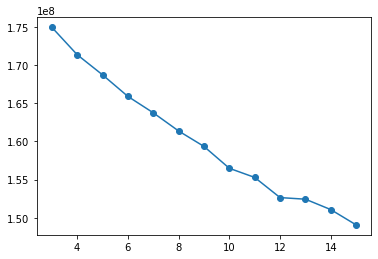

In [293]:
plt.plot(np.arange(3,16),scores,marker="o")
plt.show()


In [294]:
final_model = KMeans(12)
final_model.fit(X_pca)

KMeans(n_clusters=12)

In [295]:
gen_preds = final_model.predict(X_pca)

# Applying All Steps to the Customer Data

Now that we have clusters and cluster centers for the general population, we map customer data to those clusters.

In [315]:
# Load in the customer demographics data.
customers = pd.read_csv('./data/Udacity-DataScience-Nanodegree/03_unsupervised_models_project/CUSTOMERS_Subset.csv',';')

/home/k/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning:

In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.



In [316]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


Let us clean customer data

In [317]:
cleaned_cust = clean_data(customers)
print(cleaned_cust.shape, df_azdias_p1.shape)

/tmp/ipykernel_495516/3498703958.py:1: FutureWarning:

In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.

/tmp/ipykernel_495516/1926488367.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_495516/1926488367.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(141590, 256) (797077, 257)


The imputer and scaler aren't going to work because "GEBAEUDETYP_5.0" isn't in our cleaned_cust DataFrame. This wasn't created because the "GEBAEUDETYP" column didn't have any values of 5 in our customer set since we one-hot encoded it using pd.get_dummies instead of OneHotEncoder. Adding in a column of only zeros for this missing column is an equivalent operation to not having any values of 5 for this feature.

In [318]:


for i in df_azdias_p1.columns:
    if i not in cleaned_cust.columns:
        print(i)


GEBAEUDETYP_5.0


In [319]:
GEBAEUDETYP_5 = pd.Series(np.zeros(141725))
cleaned_cust['GEBAEUDETYP_5.0'] = GEBAEUDETYP_5

In [320]:
# Reordering columns to align with original DataFrame
cols = df_azdias_p1.columns.tolist()
cleaned_cust = cleaned_cust[cols]

In [322]:
cleaned_cust.shape[1] == df_azdias_p1.shape[1]

True

Standartization

In [323]:
imputed = med_imp.transform(cleaned_cust)
standardized = scaler.transform(imputed)

PCA

In [324]:
X_pca_cust = pca.transform(standardized)
X_pca_cust.shape

(141590, 150)

Clustering

In [325]:
preds = final_model.predict(X_pca_cust)

### Comparing Customer Data to Demographics Data

In [326]:
df_preds_cust = pd.DataFrame(preds,columns=['cust_preds'])
df_preds_gen =  pd.DataFrame(gen_preds,columns=['gen_preds'])

In [327]:
prop_cust = df_preds_cust['cust_preds'].value_counts().sort_index()/ \
                sum(df_preds_cust['cust_preds'].value_counts())
prop_gen = df_preds_gen['gen_preds'].value_counts().sort_index()/ \
                sum(df_preds_gen['gen_preds'].value_counts())

/tmp/ipykernel_495516/3281216838.py:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



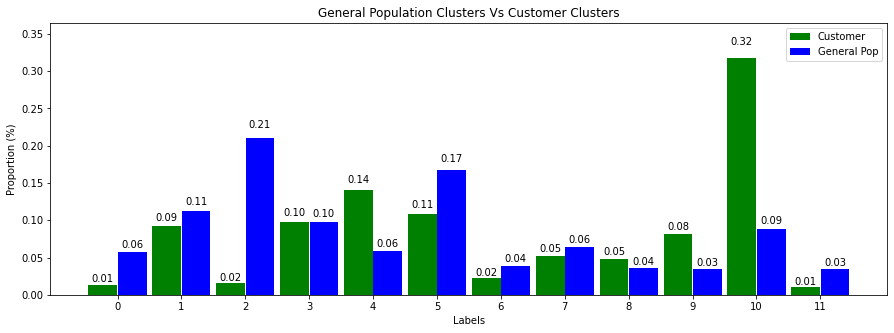

In [330]:
fig,ax = plt.subplots(figsize=(15,5))
width = 0.45

cust = ax.bar(prop_cust.index-.51*width, prop_cust, width, color='green')
gen = ax.bar(prop_gen.index+.51*width, prop_gen, width, color='blue')


ax.set_ylabel('Proportion (%)')
ax.set_xlabel('Labels')
ax.set_title('General Population Clusters Vs Customer Clusters')
ax.set_xticks(prop_cust.index)
ax.set_ylim(top=max(prop_cust.append(prop_gen))*1.15)
ax.legend(('Customer','General Pop'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

autolabel(cust)
autolabel(gen)

#### Overrepresented vs Underrepresented clasters

The two distributions are pretty different. The clusters with the most significant difference are:
    labels 0, 2, 5  are underrepresented, while label 4, 9, 10 are overrepresented in customer dataset


Let's look into these clusters more closely

cluster 2 underrepresented in customers dataset

In [332]:

centroid_df = pd.DataFrame(final_model.cluster_centers_[2],columns=['pca_weights'])
centroid_df.reindex(centroid_df.abs().sort_values('pca_weights',ascending=False).index).head()

,pca_weights
0,3.960727
1,-2.995565
3,-0.914341
5,-0.852575
8,-0.675319


PCA components 0 and 1 influence this cluster the most (positively and negatively respectfully). We can inspect them more closely

In [338]:
plot_pca_dim(pca,feat_names,0,5)

             attribute information_level     type missing_or_unknown
4    FINANZ_MINIMALIST            person  ordinal               [-1]
46  HH_EINKOMMEN_SCORE         household  ordinal             [-1,0]
60         KBA05_ANTG1     microcell_rr3  ordinal               [-1]
65           KBA05_GBZ     microcell_rr3  ordinal             [-1,0]
71          MOBI_REGIO        region_rr1  ordinal                 []
75          PLZ8_ANTG1    macrocell_plz8  ordinal               [-1]
77          PLZ8_ANTG3    macrocell_plz8  ordinal               [-1]
78          PLZ8_ANTG4    macrocell_plz8  ordinal               [-1]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Feature Names=%{x}<br>Variance (%)=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([-0.19645266,  0.18905337, -0.18026883,  0.17876117, -0.17842659]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['MOBI_REGIO', 'LP_STATUS_GROB_1.0', 'KBA05_ANTG1', 'PLZ8_ANTG3',
                          'PLZ8_ANTG1'], dtype=object),
              'xaxis': 'x',
              'y': array([-0.19645266,  0.18905337, -0.18026883,  0.17876117, -0.17842659]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Variance (%)'}},
                             'colorscale': [[0.0, 'rgb(252, 222, 156)'],
                                            [0.16666666666666666, 'rgb(250, 164,
                                            118)'], [0.3333333333333333, 'rgb(240,
                                            116, 110)'], [0.5, 'rgb(227, 79,
                                            111)'], [0.6666666666666666, 'rgb(220,
                                            57, 119)'], [0.8333333333333334,
                                            'rgb(185, 37, 122)'], [1.0, 'rgb(124,
                                            29, 111)']]},
               'height': 400,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Feature Names'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Variance (%)'}}}
})


    Positively explains low-income earners (LP_STATUS_GROB) & no. 6-10 family owned houses (PLZ8_ANTG3)
    Negatively explains movement patterns (MOBI_REGIO), no. 1-2 family owned houses (KBA05_ANTG1 & PLZ8_ANTG1)


In [339]:
plot_pca_dim(pca,feat_names,1,5)

                attribute information_level     type missing_or_unknown
1    ALTERSKATEGORIE_GROB            person  ordinal           [-1,0,9]
5           FINANZ_SPARER            person  ordinal               [-1]
6        FINANZ_VORSORGER            person  ordinal               [-1]
7          FINANZ_ANLEGER            person  ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person  ordinal               [-1]
26              SEMIO_REL            person  ordinal             [-1,9]
30              SEMIO_ERL            person  ordinal             [-1,9]
36          SEMIO_PFLICHT            person  ordinal             [-1,9]
37            SEMIO_TRADV            person  ordinal             [-1,9]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Feature Names=%{x}<br>Variance (%)=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([ 0.22934404, -0.22869225,  0.21824718, -0.21276887, -0.20845544]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['ALTERSKATEGORIE_GROB', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
                          'FINANZ_UNAUFFAELLIGER', 'SEMIO_REL'], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.22934404, -0.22869225,  0.21824718, -0.21276887, -0.20845544]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Variance (%)'}},
                             'colorscale': [[0.0, 'rgb(252, 222, 156)'],
                                            [0.16666666666666666, 'rgb(250, 164,
                                            118)'], [0.3333333333333333, 'rgb(240,
                                            116, 110)'], [0.5, 'rgb(227, 79,
                                            111)'], [0.6666666666666666, 'rgb(220,
                                            57, 119)'], [0.8333333333333334,
                                            'rgb(185, 37, 122)'], [1.0, 'rgb(124,
                                            29, 111)']]},
               'height': 400,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Feature Names'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Variance (%)'}}}
})


    Positively explains estimated age (ALTERSKATEGORIE_GROB) and people that prioritize financial preparedness (FINANZ_VORSORGER)
    Negatively explains money savers (FINANZ_SPARER), people financially inconspicuous (FINANZ_UNAUFFAELLIGER), and religious mindedness (SEMIO_REL)


cluster 10 overrepresented in customers dataset

In [340]:

centroid_df = pd.DataFrame(final_model.cluster_centers_[10],columns=['pca_weights'])
centroid_df.reindex(centroid_df.abs().sort_values('pca_weights',ascending=False).index).head()

,pca_weights
0,-5.007096
3,2.519474
5,-1.968985
15,-1.592742
6,-1.426288


Let's take a look at the PC 3

In [341]:
plot_pca_dim(pca,feat_names,3,5)

           attribute information_level         type missing_or_unknown
13  GREEN_AVANTGARDE            person  categorical                 []
44      ANZ_PERSONEN         household      numeric                 []
48    W_KEIT_KIND_HH         household      ordinal             [-1,0]
83       ORTSGR_KLS9         community      ordinal             [-1,0]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Feature Names=%{x}<br>Variance (%)=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([-0.2907814 , -0.2907814 ,  0.24407795,  0.22806128, -0.17589873]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['LP_FAMILIE_FEIN_1.0', 'LP_FAMILIE_GROB_1.0', 'ANZ_PERSONEN',
                          'LP_FAMILIE_GROB_5.0', 'W_KEIT_KIND_HH'], dtype=object),
              'xaxis': 'x',
              'y': array([-0.2907814 , -0.2907814 ,  0.24407795,  0.22806128, -0.17589873]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Variance (%)'}},
                             'colorscale': [[0.0, 'rgb(252, 222, 156)'],
                                            [0.16666666666666666, 'rgb(250, 164,
                                            118)'], [0.3333333333333333, 'rgb(240,
                                            116, 110)'], [0.5, 'rgb(227, 79,
                                            111)'], [0.6666666666666666, 'rgb(220,
                                            57, 119)'], [0.8333333333333334,
                                            'rgb(185, 37, 122)'], [1.0, 'rgb(124,
                                            29, 111)']]},
               'height': 400,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'width': 600,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Feature Names'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Variance (%)'}}}
})


    Positively explains no. adults in household (ANZ_PERSONEN) & multi-person households (LP_FAMILIE_GROB)
    Negatively explains single households (LP_FAMILIE_FEIN) and likelihood of children (1- most likely & 6 - very unlikely)
